Набор данных с прошлой лабораторной работы не подходил для метода кластеризации K-means. Я взял другой набор данных для работы.

Источник - https://www.kaggle.com/datasets/fundal/students-annual-score-in-history-geography-subject

Данные в датасете являются настоящими.

В новом наборе данных хранится информация о поле ученика, результатов 3 тестов и 3 экзаменов, годовом результате ученика и зачете\незачете.

К набору данных будет добавлен атрибут 'Grade' - Оценка ученика относительно его годового показателя:
меньше 50 - 2;
от 50 до 70 - ;3
от 71 до 85 -; 4
от 86 до 100 - 5.

In [168]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("dataframe.csv")

df.drop('Unnamed: 9', axis = 1, inplace = True) #Удаление пустого столбца

num_clmns = ['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03','Annual_Score', 'Success']

def evaluate_success(x):
    if x < 50:
        return 2
    elif 50 <= x <= 70:
        return 3
    elif 71 <= x <= 85:
        return 4
    else:
        return 5

df['Grade'] = df['Annual_Score'].apply(evaluate_success)

print(df.head())
print('----------------------')

  Gender  Test_01  Exam_01  Test_02  Exam_02  Test_03  Exam_03  Annual_Score  \
0      F    72.50    93.75    81.25    86.25    100.0    86.25         87.36   
1      F    68.75    81.25    65.00    56.25     90.0    71.25         71.25   
2      F    67.50    58.75    42.50    45.00     85.0    50.00         55.83   
3      F    58.75    87.50    75.00    76.25    100.0    81.25         80.42   
4      F    90.00    83.75    70.00    93.75     90.0    88.75         86.94   

   Success  Grade  
0        1      5  
1        1      4  
2        1      3  
3        1      4  
4        1      5  
----------------------


Далее стоит "причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения и т.п.

Однако обрабатывать выбросы не стоит, так как все данные, кроме значений в атрибуте "Test_02", судя по диаграммам, не превышают 100-бальную систему или минимум\максимум допустимых значений. Поэтому представленный метод IQR для удаления выбросов будет использован только для одного атрибута.

в наборе данных 0 дублей
Gender          0
Test_01         0
Exam_01         0
Test_02         0
Exam_02         0
Test_03         0
Exam_03         0
Annual_Score    0
Success         0
Grade           0
dtype: int64


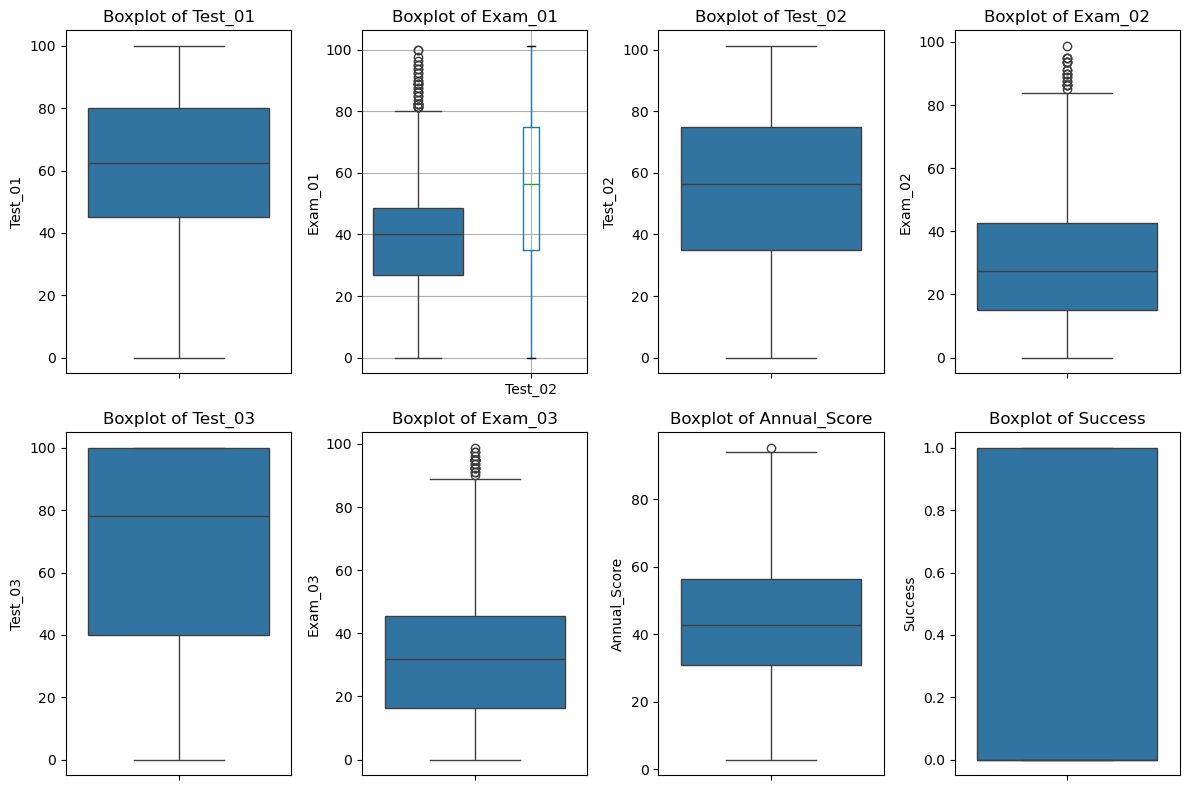

In [169]:
count = 0
for str in df.duplicated():
    if str == True:
        count+=1
print(f"в наборе данных {count} дублей")
if count > 0:
    df = df.drop_duplicates() #Удаления дублей
    print("Дубли удалены")

#Удаления пропущенных значений, если они есть
print(df.isnull().sum())  #Проверка на наличие пропущенных значений
#Пропущенных значений нет, идем дальше

#Удаление выбросов методом межквартильного размаха(IQR)
plt.figure(figsize=(12, 8))
for i, clmn in enumerate(num_clmns):
    if clmn == 'Test_02':
        med = df[clmn].median() #Нахождение медианы данных, это нужно сделать, т к данные ассимметричны
        Q1, Q3 = df[clmn].quantile([0.25, 0.75]) 
        IQR = Q3-Q1 
        df_IQR = df[(df[clmn] >= (med - 1.5 * IQR)) & (df[clmn] <= (med + 1.5 * IQR))]
        df_IQR.boxplot(column=clmn)        #Вывод гистограммы датасета без выбросов
    plt.subplot(2,4, i + 1)
    sns.boxplot(data = df, y = clmn)   #Вывод гистограммы изначального датасета с выбросами
    plt.title(f'Boxplot of {clmn}')
plt.tight_layout()
plt.show()


Далее будет построены графики зависимостей от одной переменной к другой.

В этом наборе данных можно выделить несколько кластеров: выделить кластеры мужского и женского пола для дальнейшего анализа и сравнения успеваемости.

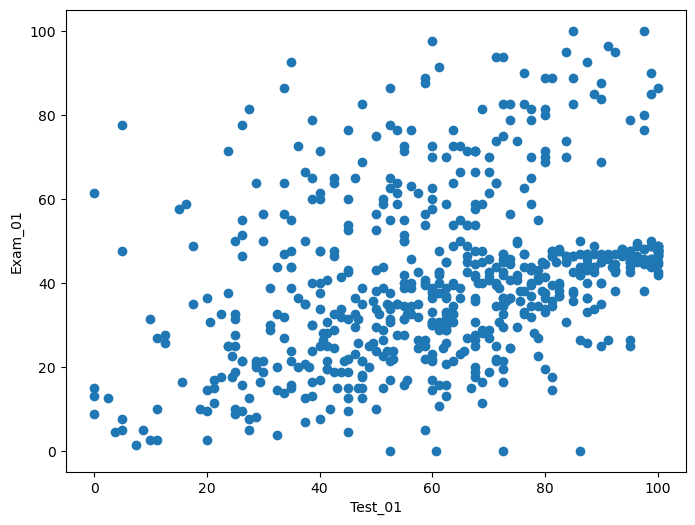

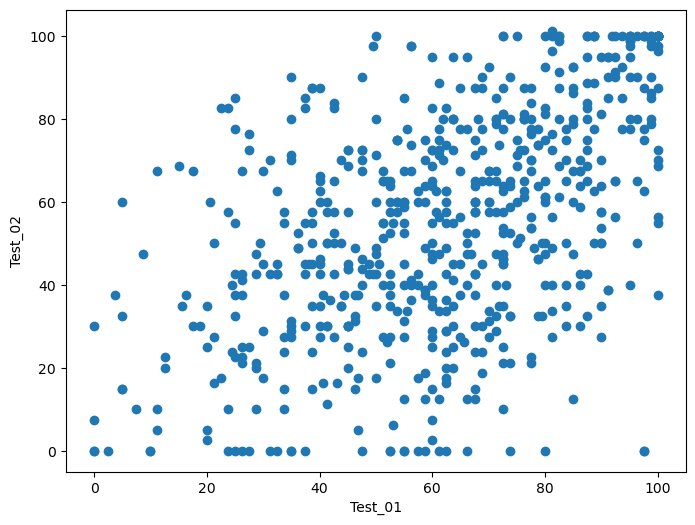

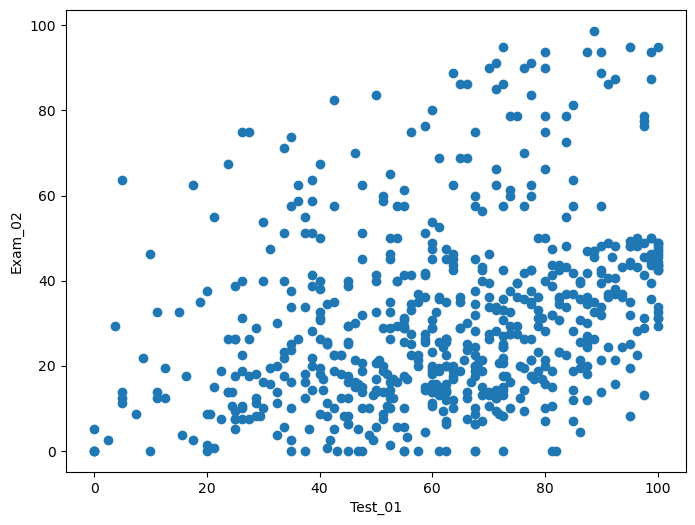

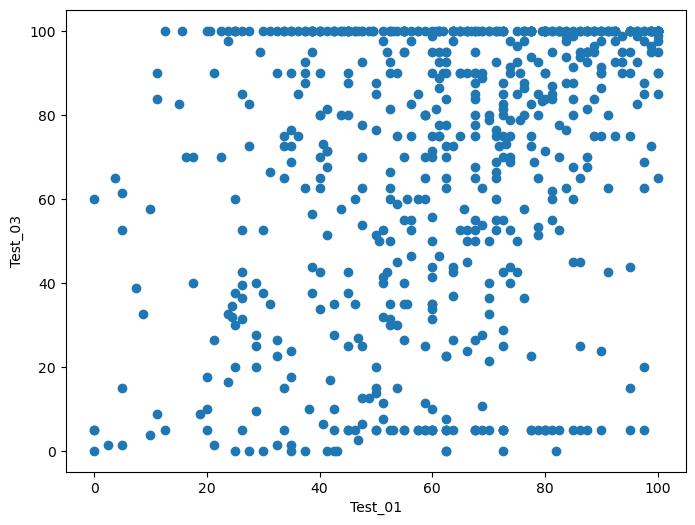

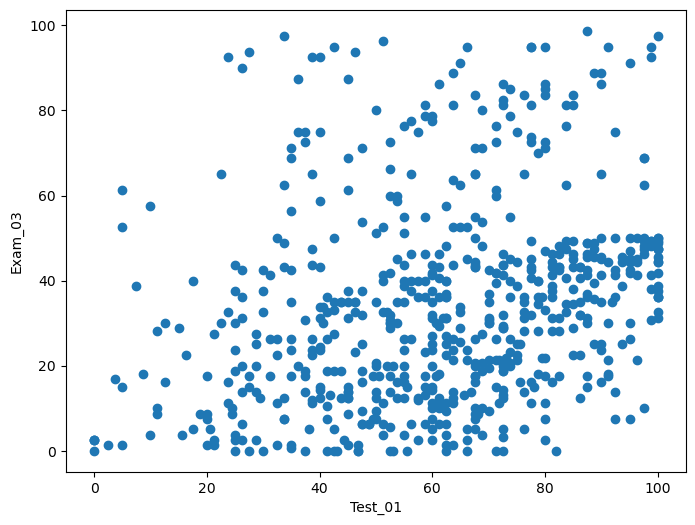

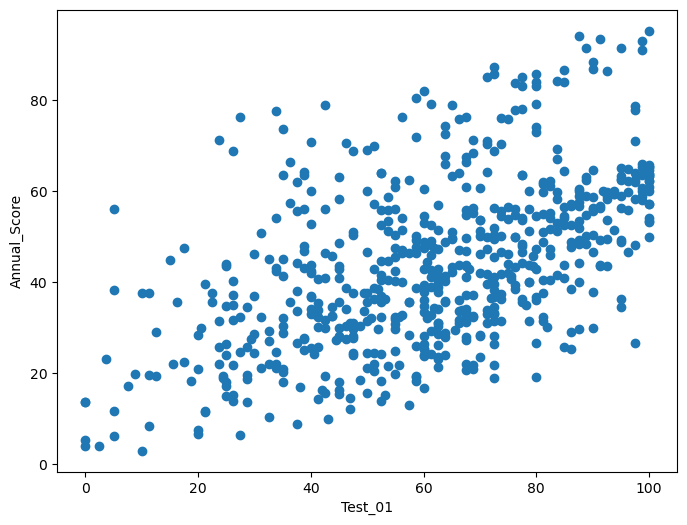

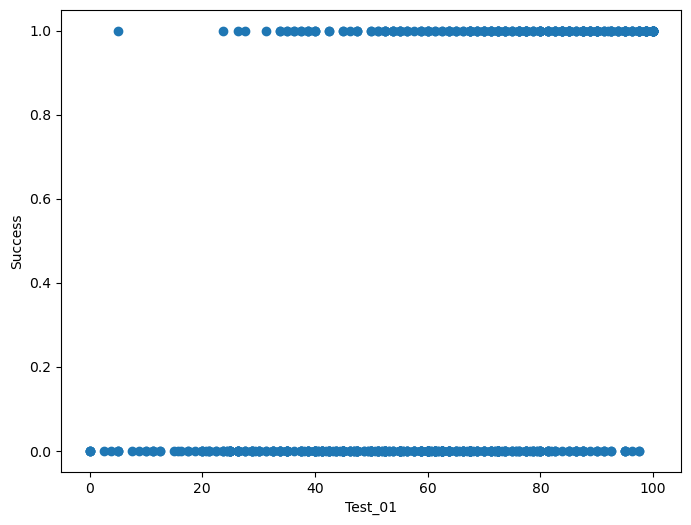

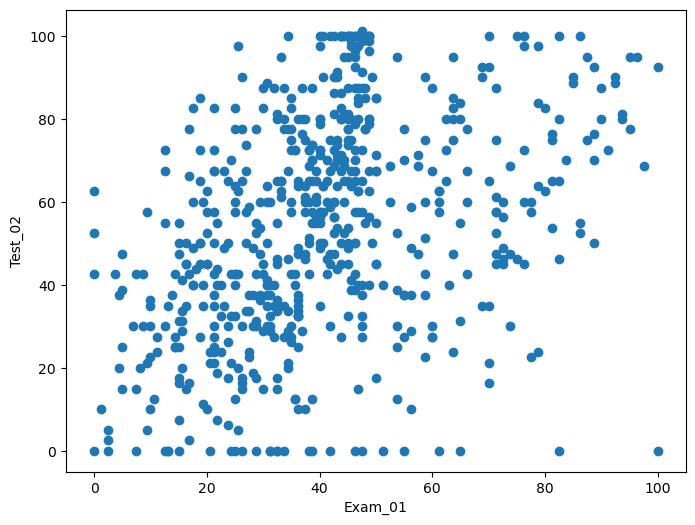

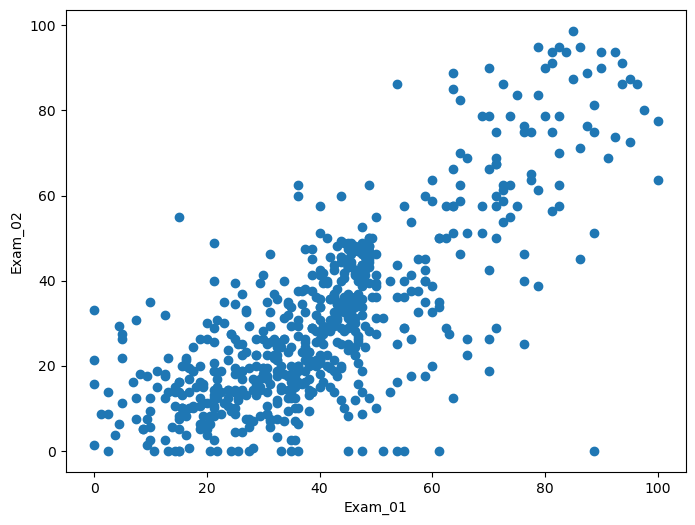

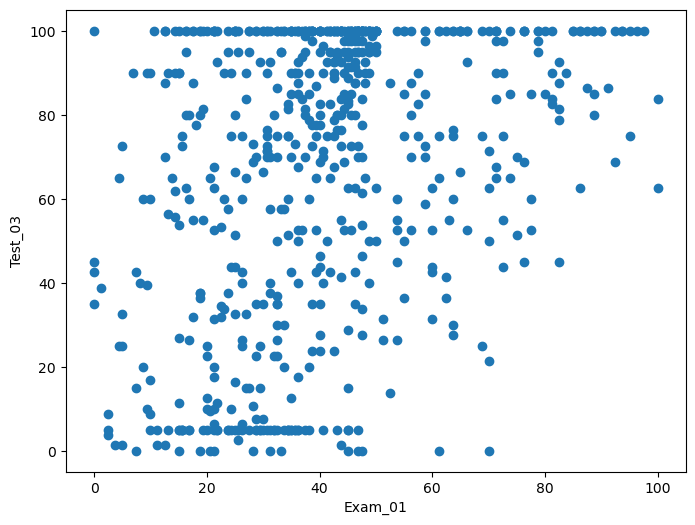

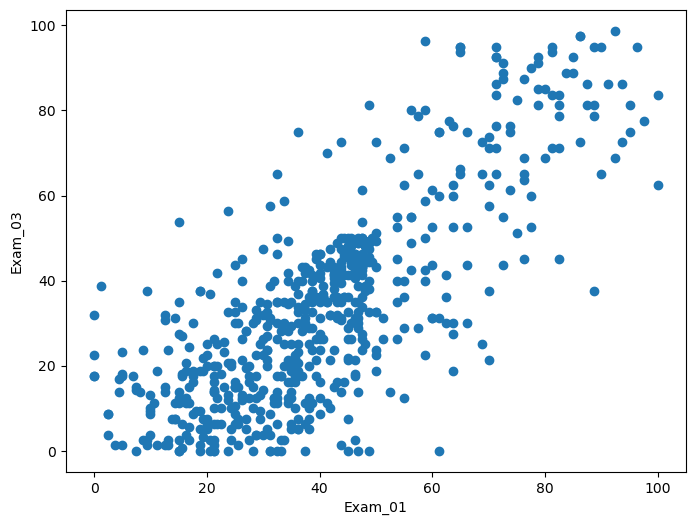

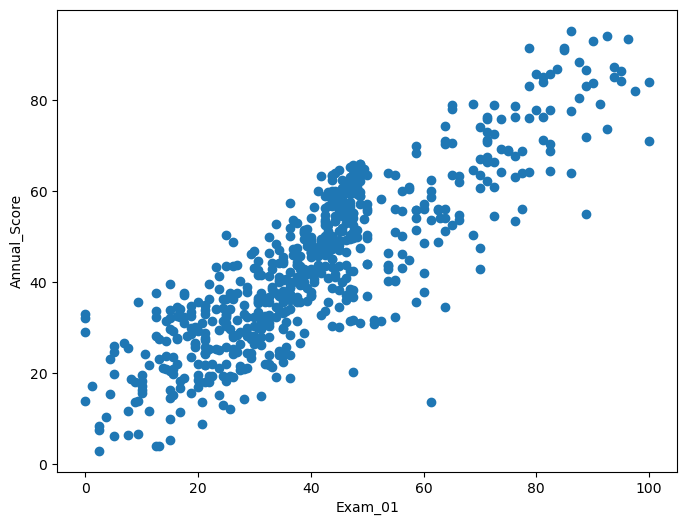

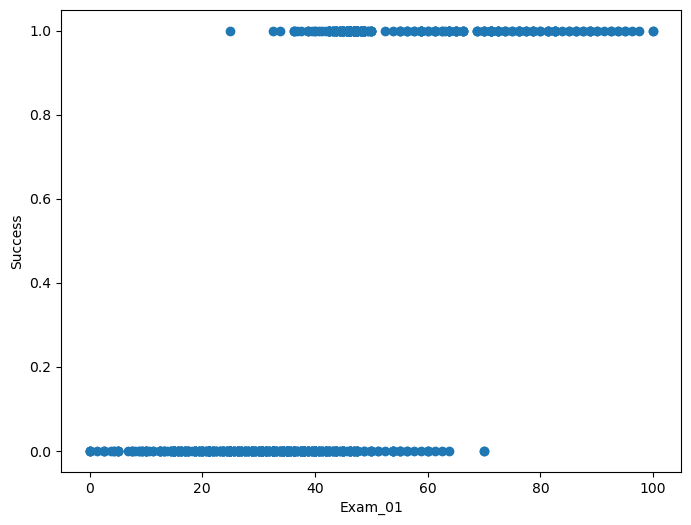

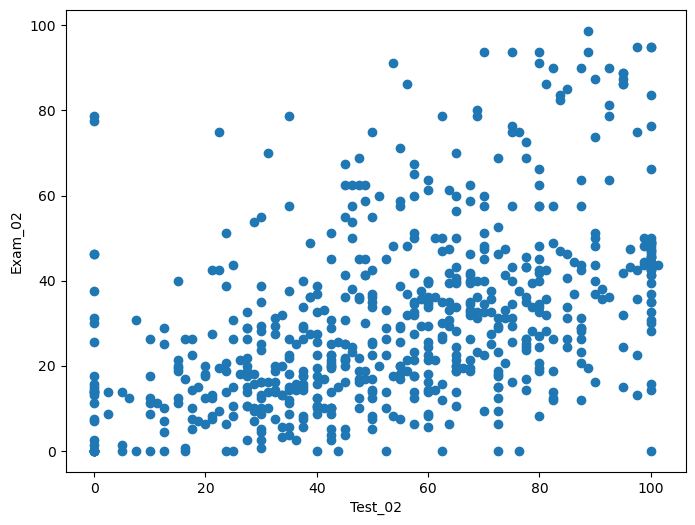

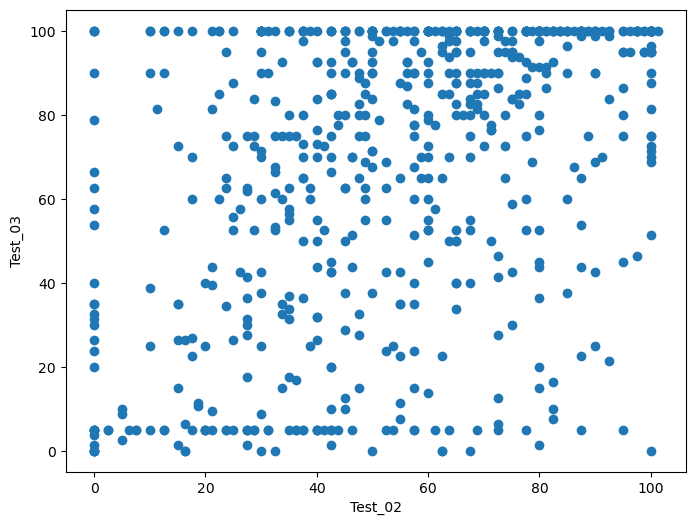

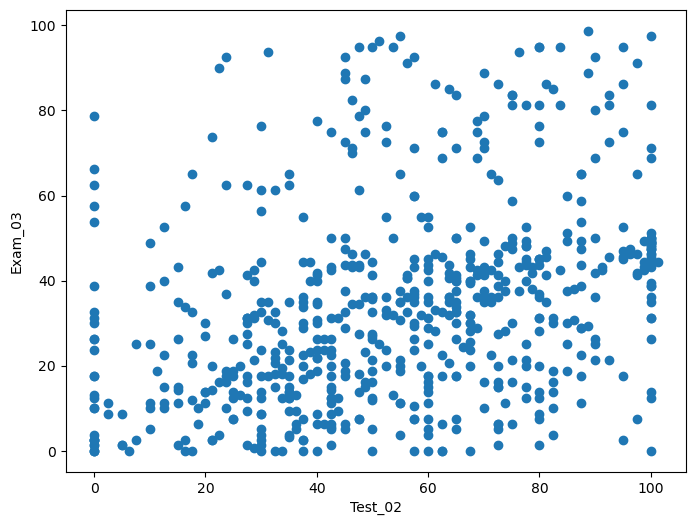

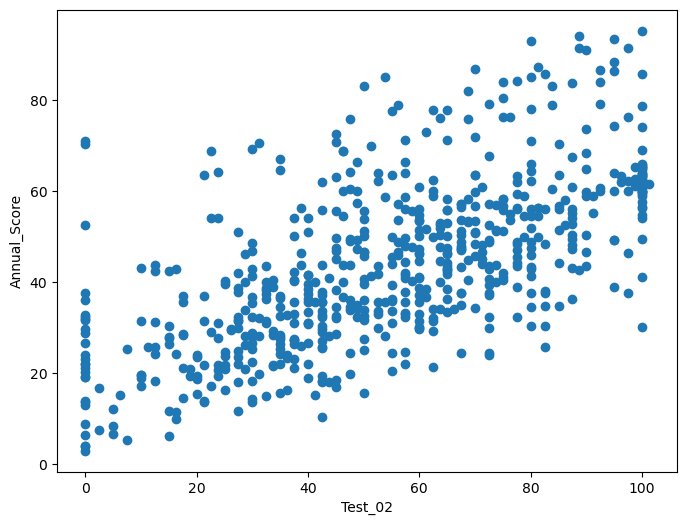

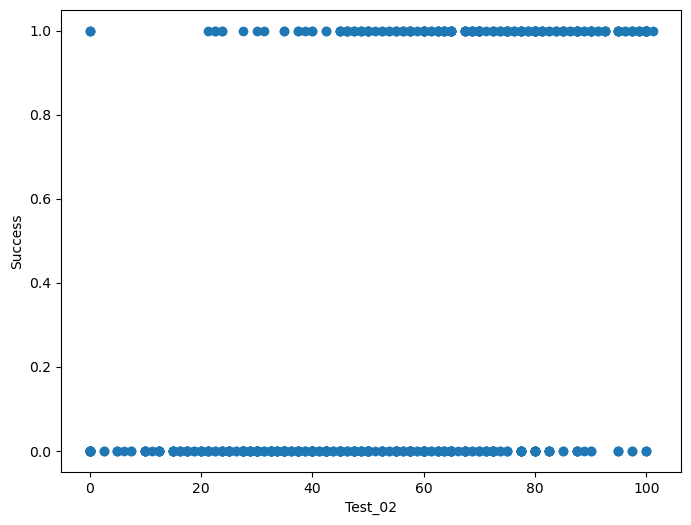

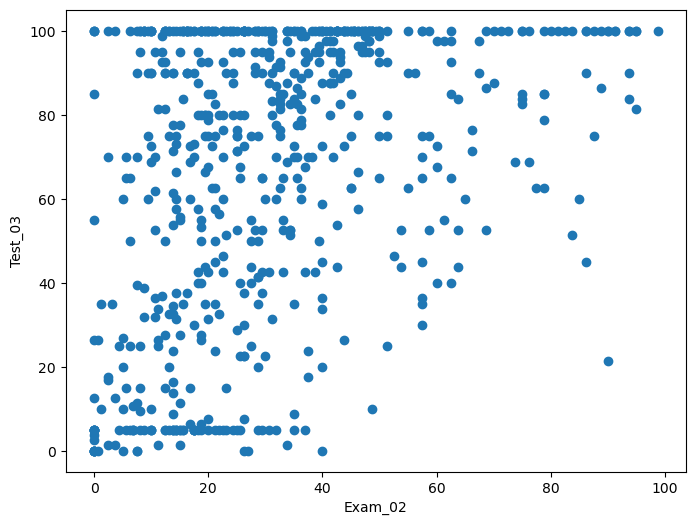

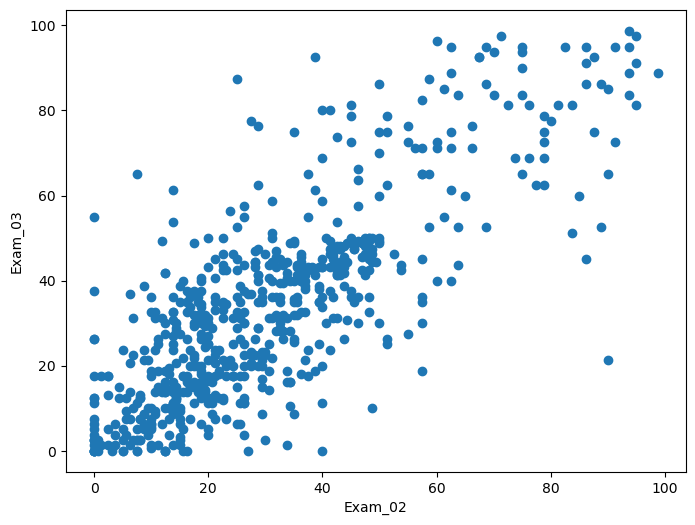

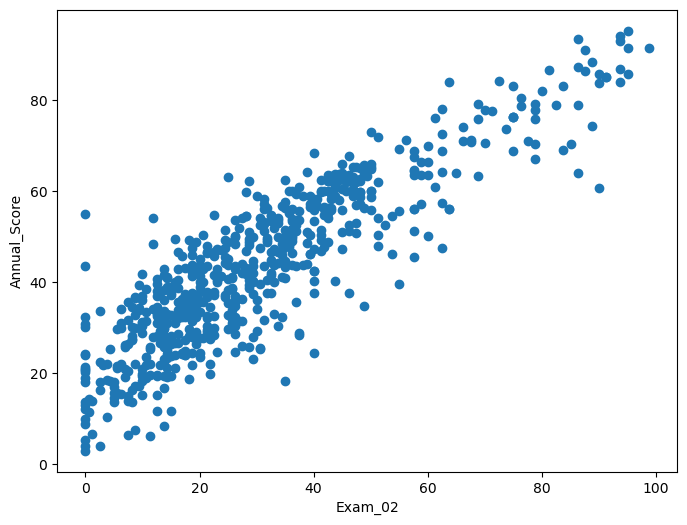

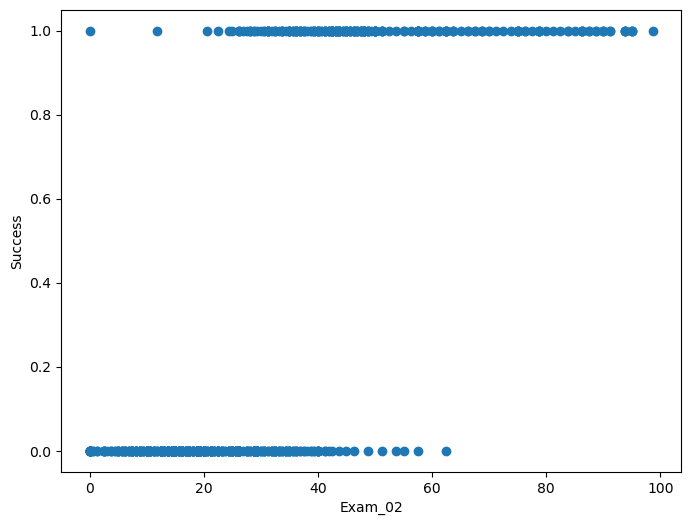

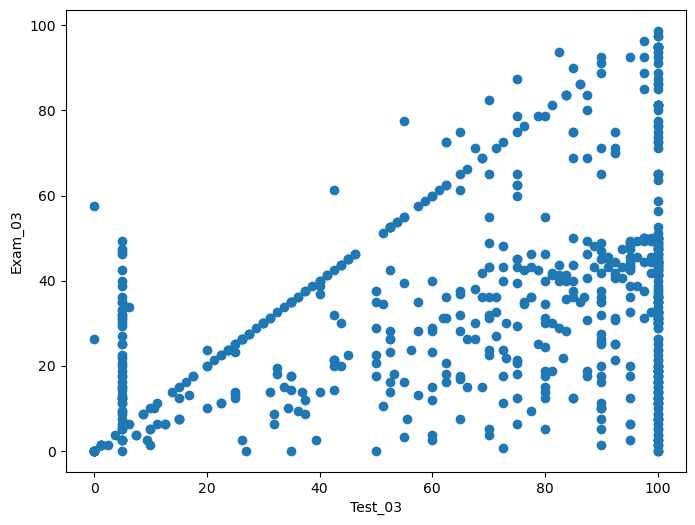

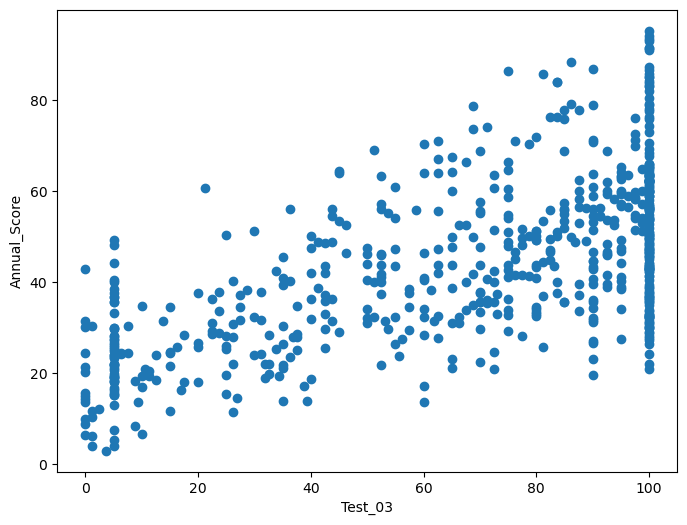

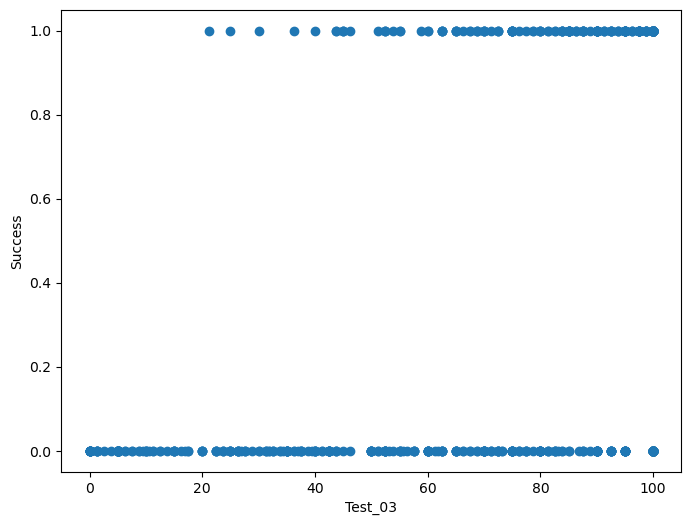

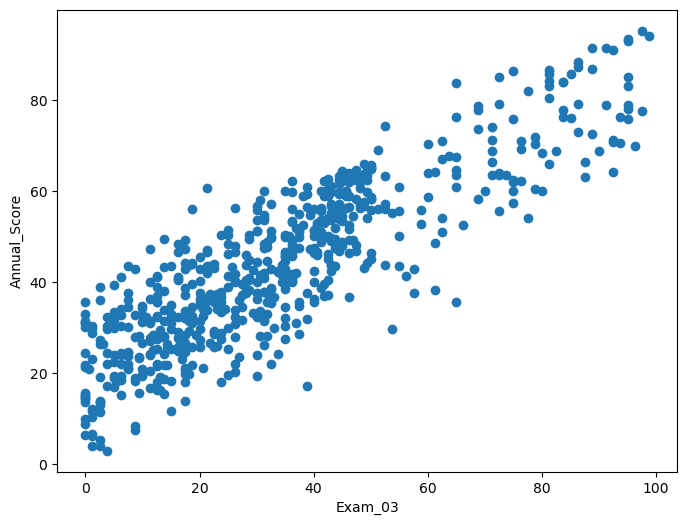

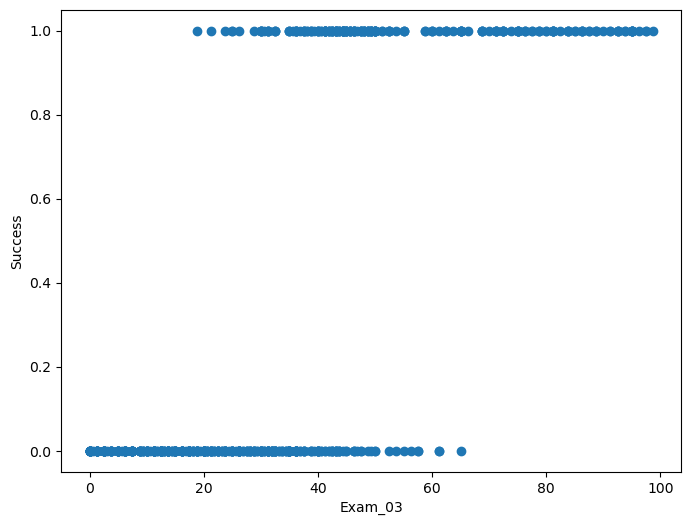

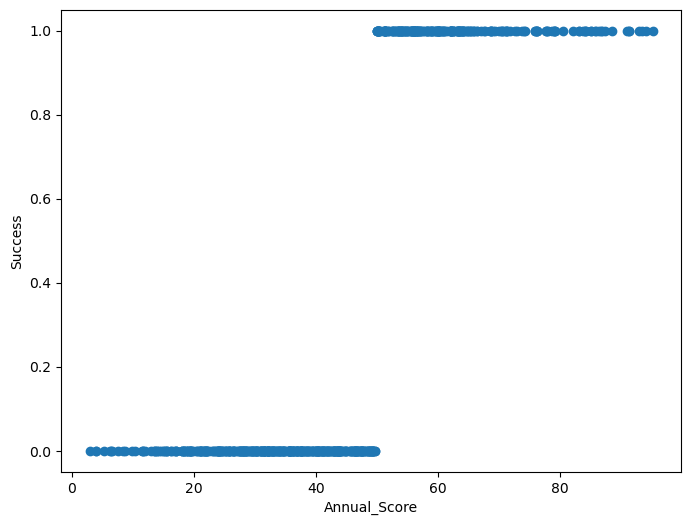

In [170]:
for i in range(len(num_clmns)):
    for j in range(i+1,len(num_clmns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_IQR[num_clmns[i]], df[num_clmns[j]])
        plt.xlabel(num_clmns[i])
        plt.ylabel(num_clmns[j])
        plt.show()

Далее применю метод K-means для набора данных. Для начала нужно понять, сколько кластеров использовать для методов. Для этого будет использован метод локтя для выбора оптимального количества групп.

     Gender  Test_01  Exam_01  Test_02  Exam_02  Test_03  Exam_03  \
0         1    72.50    93.75    81.25    86.25   100.00    86.25   
1         1    68.75    81.25    65.00    56.25    90.00    71.25   
2         1    67.50    58.75    42.50    45.00    85.00    50.00   
3         1    58.75    87.50    75.00    76.25   100.00    81.25   
4         1    90.00    83.75    70.00    93.75    90.00    88.75   
..      ...      ...      ...      ...      ...      ...      ...   
629       1   100.00    47.50   100.00    48.75   100.00    50.00   
630       1    86.25    43.12    63.75    30.62    93.75    40.62   
631       1    85.00    46.25    78.75    28.12    91.25    43.12   
632       0    62.50    36.88    28.75    15.62    83.75    40.00   
633       1   100.00    46.25    72.50    31.25    98.75    44.38   

     Annual_Score  Success  Grade  
0           87.36        1      5  
1           71.25        1      4  
2           55.83        1      3  
3           80.42        1 

C:\Users\Gregory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Gregory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Gregory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Gregory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

Text(0, 0.5, 'WCSS')

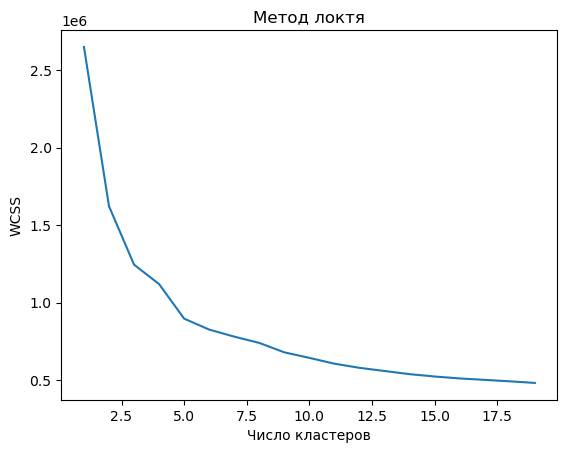

In [171]:
df_IQR['Gender'] = df_IQR['Gender'].map({'M': 0, 'F': 1})

features = df_IQR[[clmn for clmn in df_IQR.columns]]

print(features)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')

In [174]:
k = 5 #Оптимальное количество кластеров

kmeans = KMeans(n_clusters=k, random_state=42)
df_IQR['Cluster'] = kmeans.fit_predict(features)

print(df_IQR.groupby('Cluster').mean())  # Средние значения по кластерам

           Gender    Test_01    Exam_01    Test_02    Exam_02    Test_03  \
Cluster                                                                    
0        0.606557  44.113934  22.510492  25.030738  12.479344  16.958197   
1        0.843373  83.080120  44.661145  77.424699  35.583735  92.262952   
2        0.623656  64.206989  42.734086  58.991935  29.919677  33.877957   
3        0.647799  49.076101  29.980252  44.143082  19.858239  86.069182   
4        0.670213  65.013298  74.867021  65.598404  68.138298  85.199468   

           Exam_03  Annual_Score   Success     Grade  
Cluster                                               
0        13.949918     20.442951  0.000000  2.000000  
1        38.034639     54.369398  0.746988  2.746988  
2        30.604731     40.399032  0.118280  2.118280  
3        23.341132     36.183208  0.018868  2.018868  
4        77.194149     72.912660  1.000000  3.776596  


C:\Users\Gregory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Выводы: 

В результате применения k-means кластеризации, судя по итогам анализа, можно сказать, что 4-й кластер - самые успешные ученики, получившие зачет; 0-ой кластер - самые неуспешные ученики, которые не смогли получить зачет. 1-й, 2-й и 3-й кластеры - совокупность учеников с зачетом и незачетом. При этом 2-й кластер имеет средние значения относительно других.